In [1]:
# Importing libraries
from sys import platform
import sys
# To import files from directories
import os; from os import listdir; from os.path import isfile, join
# Image reader
from skimage import io ; from skimage.io import imread
# Plotting
import matplotlib as mpl ; import matplotlib.pyplot as plt 
import matplotlib.path as mpltPath
# To manipulate arrays
import numpy as np 
import random
import re
import math
from tqdm.notebook import tqdm
import scipy
import pandas as pd
import pathlib
from skimage.exposure import rescale_intensity
# importing cellpose
from cellpose import models, io
from skimage.measure import find_contours
# To create interactive elements
import ipywidgets as widgets ; from ipywidgets import interact, interactive, fixed, interact_manual, Button, HBox, VBox, Layout, GridspecLayout ; from IPython.display import Image
# Figure style and size
from matplotlib import gridspec
mpl.rc('figure',  figsize=(7, 7)); mpl.rc('image', cmap='gray'); mpl.rc('axes', grid=False); mpl.rcParams['figure.dpi'] = 300
%matplotlib inline 

In [2]:
# Deffining directories
current_dir = pathlib.Path().absolute()
rsnaped_dir = current_dir.parents[1].joinpath('rsnaped')
# Importing rSNAPsim_IP
sys.path.append(str(rsnaped_dir))
import rsnaped as rsp

# FISH data. 

In [3]:
# Deffining directories
current_dir = pathlib.Path().absolute()
#video_dir = current_dir.parents[1].joinpath('DataBases', 'LargeDataSets' ,'Linda_smiFISH_images','20210511','smFISH','GAPDH-Exon-cy5')
video_dir = current_dir.parents[1].joinpath('DataBases', 'LargeDataSets' ,'MS2_Cy3_Cy5_TPL_4h')
#video_dir = current_dir.parents[1].joinpath('DataBases', 'LargeDataSets' ,'test')

In [4]:
# optional section of code to merge images in case they are not merged in a single file
list_file_names, list_merged_images, number_images,output_to_path = rsp.MergeChannels(video_dir, substring_to_detect_in_file_name = '.*_C0.tif', save_figure =1).merge()

In [5]:
output_to_path

PosixPath('/home/luisub/Desktop/rsnaped/DataBases/LargeDataSets/MS2_Cy3_Cy5_TPL_4h/merged')

In [6]:
os.path.exists(output_to_path)

True

In [7]:
# directly reading figures in folder
list_images, path_files, list_file_names, number_images = rsp.ReadImages(output_to_path).read()

In [8]:
len(list_images)

12

In [9]:
# Preprossesing

remove_outliers = True
rescale_video = True

# Remove outliers from the image
if remove_outliers == True:
    list_images = [rsp.RemoveExtrema(list_images[f],min_percentile=1,max_percentile=90).remove_outliers() for f,_ in enumerate(list_images) ]

# Rescaling images
if rescale_video == True:
    list_images_rescaled = []
    number_channels = list_images[0].shape[-1]
    
    for i in range (0,number_images ):
        number_z_slices = list_images[i].shape[0]
        print(number_z_slices)
        temp_img = np.zeros_like(list_images[i])
        for j in range(0,number_channels):
            temp_img[:,:,:,j] =  np.asarray( [ rescale_intensity(list_images[i][z,:,:,j], in_range='image', out_range='dtype')  for z in range (0, number_z_slices)]  )
        list_images_rescaled.append(temp_img)
        del temp_img
    list_images = list_images_rescaled


21
25
21
21
19
19
19
17
17
17
19
19


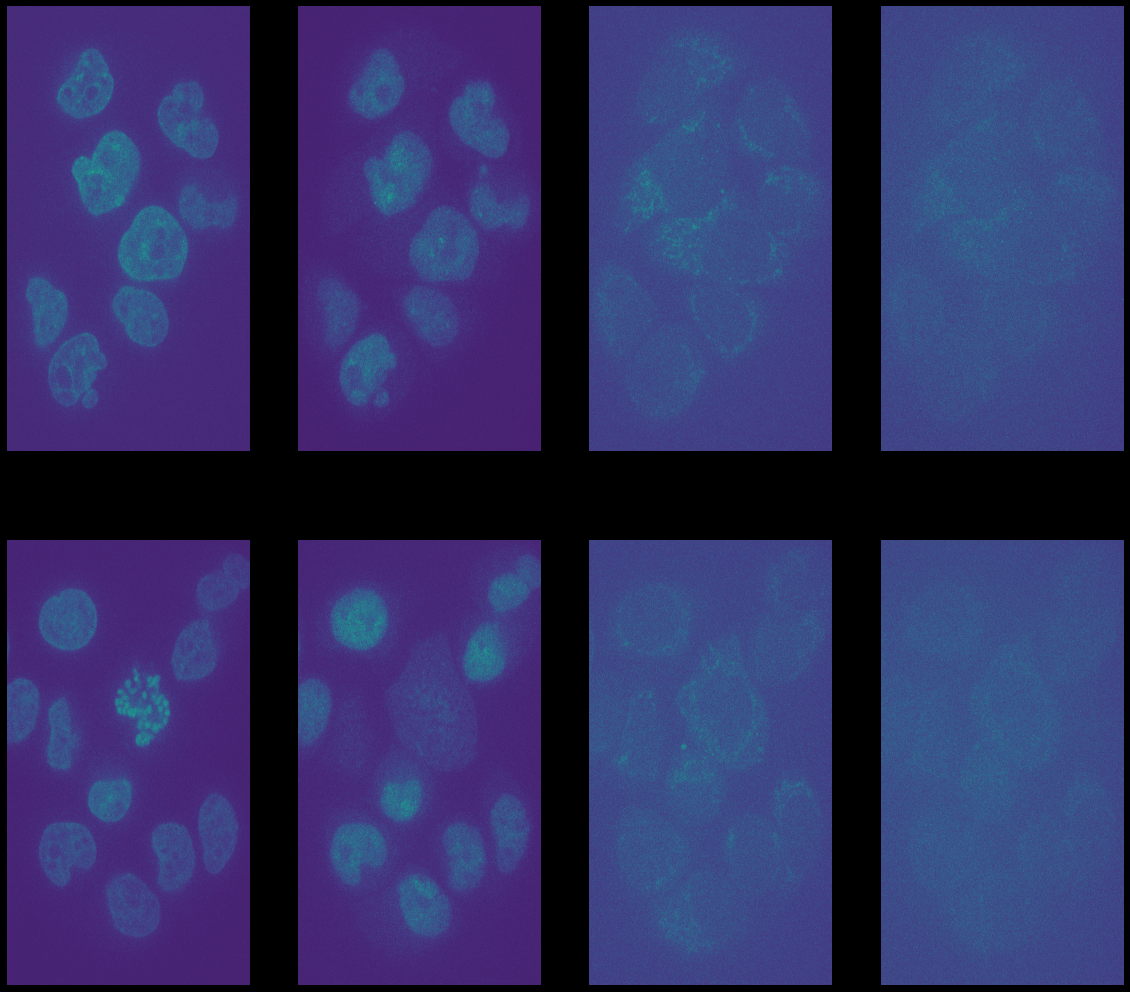

In [18]:
selected_z_slice = list_images[0].shape[0]//2 # selecting a z slice e to display in the plot.
number_channels = list_images[0].shape[-1]
number_images = 2 #len(list_images)

fig_size = (20, number_images*9)
fig, ax = plt.subplots(ncols=number_channels,nrows=number_images, figsize=fig_size)

for k in range (0, number_images):
    for i in range(0,number_channels):
        ax[k,i].imshow(list_images[k][selected_z_slice,:,:,i],cmap='viridis')
        ax[k,i].axis('off')
        ax[k,i].axis('tight')
  #ax[i].set_title(' SIMULATED Channel_'+str(i) + ' Mean_Int = ' +str(round(mean_int,0)) , size=16)
#plt.savefig('./results/sim_cell.png')
plt.show()

25


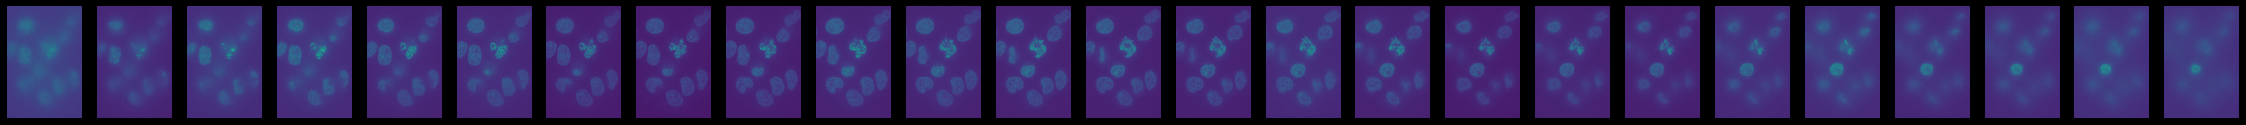

In [14]:
# Plotting z-slices for a single image
selected_image = 1
selected_channel = 0
number_z_slices = list_images[selected_image].shape[0]
print(number_z_slices)
for i in range (0,1):#number_images ):
    fig, axes = plt.subplots(nrows=1, ncols=number_z_slices, figsize=(40, 20))
    for j in range(0,number_z_slices):
        axes[j].imshow(list_images[selected_image][j,:,:,selected_channel],cmap='viridis')
        axes[j].axis('off')   
    plt.show()

In [11]:
# Filters
#list_images_bp_filtered = [rsp.BandpassFilter(list_images[f],low_pass=1, high_pass=20).apply_filter() for f,_ in enumerate(list_images) ] # Bandpass filter
#list_images_gaussian_filtered = [rsp.GaussianFilter(list_images[f],sigma=1).apply_filter() for f,_ in enumerate(list_images) ] # Gaussian filter
#list_images_filtered = [rsn.GaussianLaplaceFilter(list_images_rescaled[f],sigma=1).apply_filter() for f,_ in enumerate(list_images_rescaled) ]
#list_images_filtered = [rsn.GaussianFilter(list_images_filtered[f],sigma=1).apply_filter() for f,_ in enumerate(list_images_filtered) ]